# Graduate Admission 

Nous allons étudier les facteurs qui déterminent l'admission d'un élève à un master en université américaine. 

Parmi ces facteurs, on compte : 

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

0. Importez les librairies usuelles

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(8,5)})

1. Importez le dataset et affichez le sous forme de DataFrame 

In [45]:
admissions = pd.read_csv('./Dataset/Admission_Predict_Ver1.1.csv', sep=",")

In [46]:
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


2. Notre variable est exprimée comme une probabilité. On voudrait que ce soit plutôt une classe. Remplacez donc toutes les probabilités supérieures à 75% par 1 et les autres par 0 

In [47]:
mask = admissions["Chance of Admit "] > 0.75

In [48]:
admissions["Chance of Admit "][mask] = 1

In [49]:
admissions["Chance of Admit "][- mask]= 0

In [50]:
admissions["Chance of Admit "].dtypes

dtype('float64')

In [51]:
admissions["Chance of Admit "] = admissions["Chance of Admit "].astype(int)

In [52]:
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [58]:
admissions.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


3. Regardez la répartition de GRE Score par rapport à l'admission 

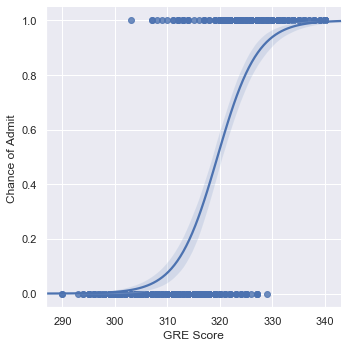

In [53]:
sns.lmplot(x = "GRE Score", y = "Chance of Admit ", data = admissions, logistic=True)

4. Faites de même avec le Toefl Score  / CGPA

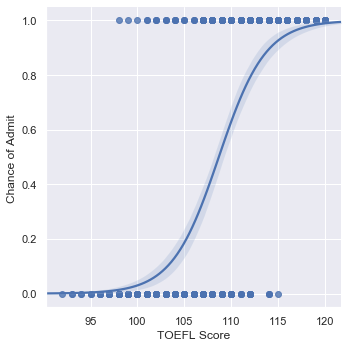

In [54]:
sns.lmplot(x = "TOEFL Score", y = "Chance of Admit ", data = admissions, logistic=True)

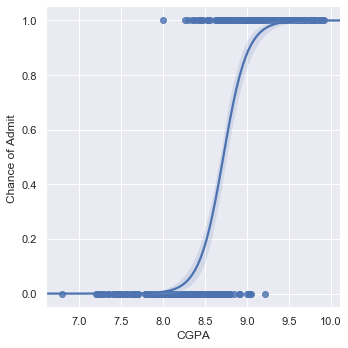

In [55]:
sns.lmplot(x = "CGPA", y = "Chance of Admit ", data = admissions, logistic=True)

5. Faites un barplot sur la colonne LOR / SOP / University Rating / Research

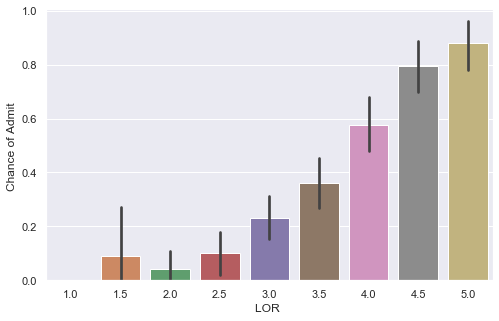

In [59]:
sns.barplot(x = "LOR ", y = "Chance of Admit ", data = admissions)

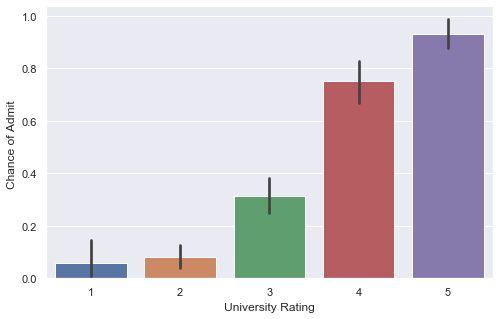

In [61]:
sns.barplot(x = "University Rating", y = "Chance of Admit ", data = admissions)

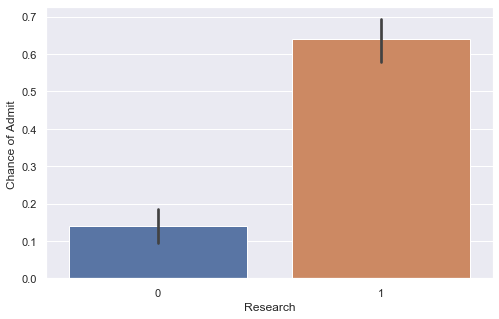

In [62]:
sns.barplot(x = "Research", y = "Chance of Admit ", data = admissions)

6. Séparez votre dataset en variables explicatives : ```X``` & variable cible : ```y``` 

In [63]:
X = admissions.drop(columns = "Chance of Admit ")

In [64]:
y = admissions["Chance of Admit "]

7. Séparez votre dataset en données d'entrainement et de test 

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

8. Tentez de faire un premier arbre de décision et évaluez votre score dans une matrice de confusion

In [71]:
from sklearn import tree

clf_gini = tree.DecisionTreeClassifier()
clf_gini = clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
from sklearn.metrics import classification_report

print("GINI")
print(classification_report(y_true = y_test, y_pred = clf_gini.predict(X_test)))

GINI
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        87
           1       0.83      0.84      0.83        63

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



0.8666666666666667

9. Visualisez votre arbre via graphviz 

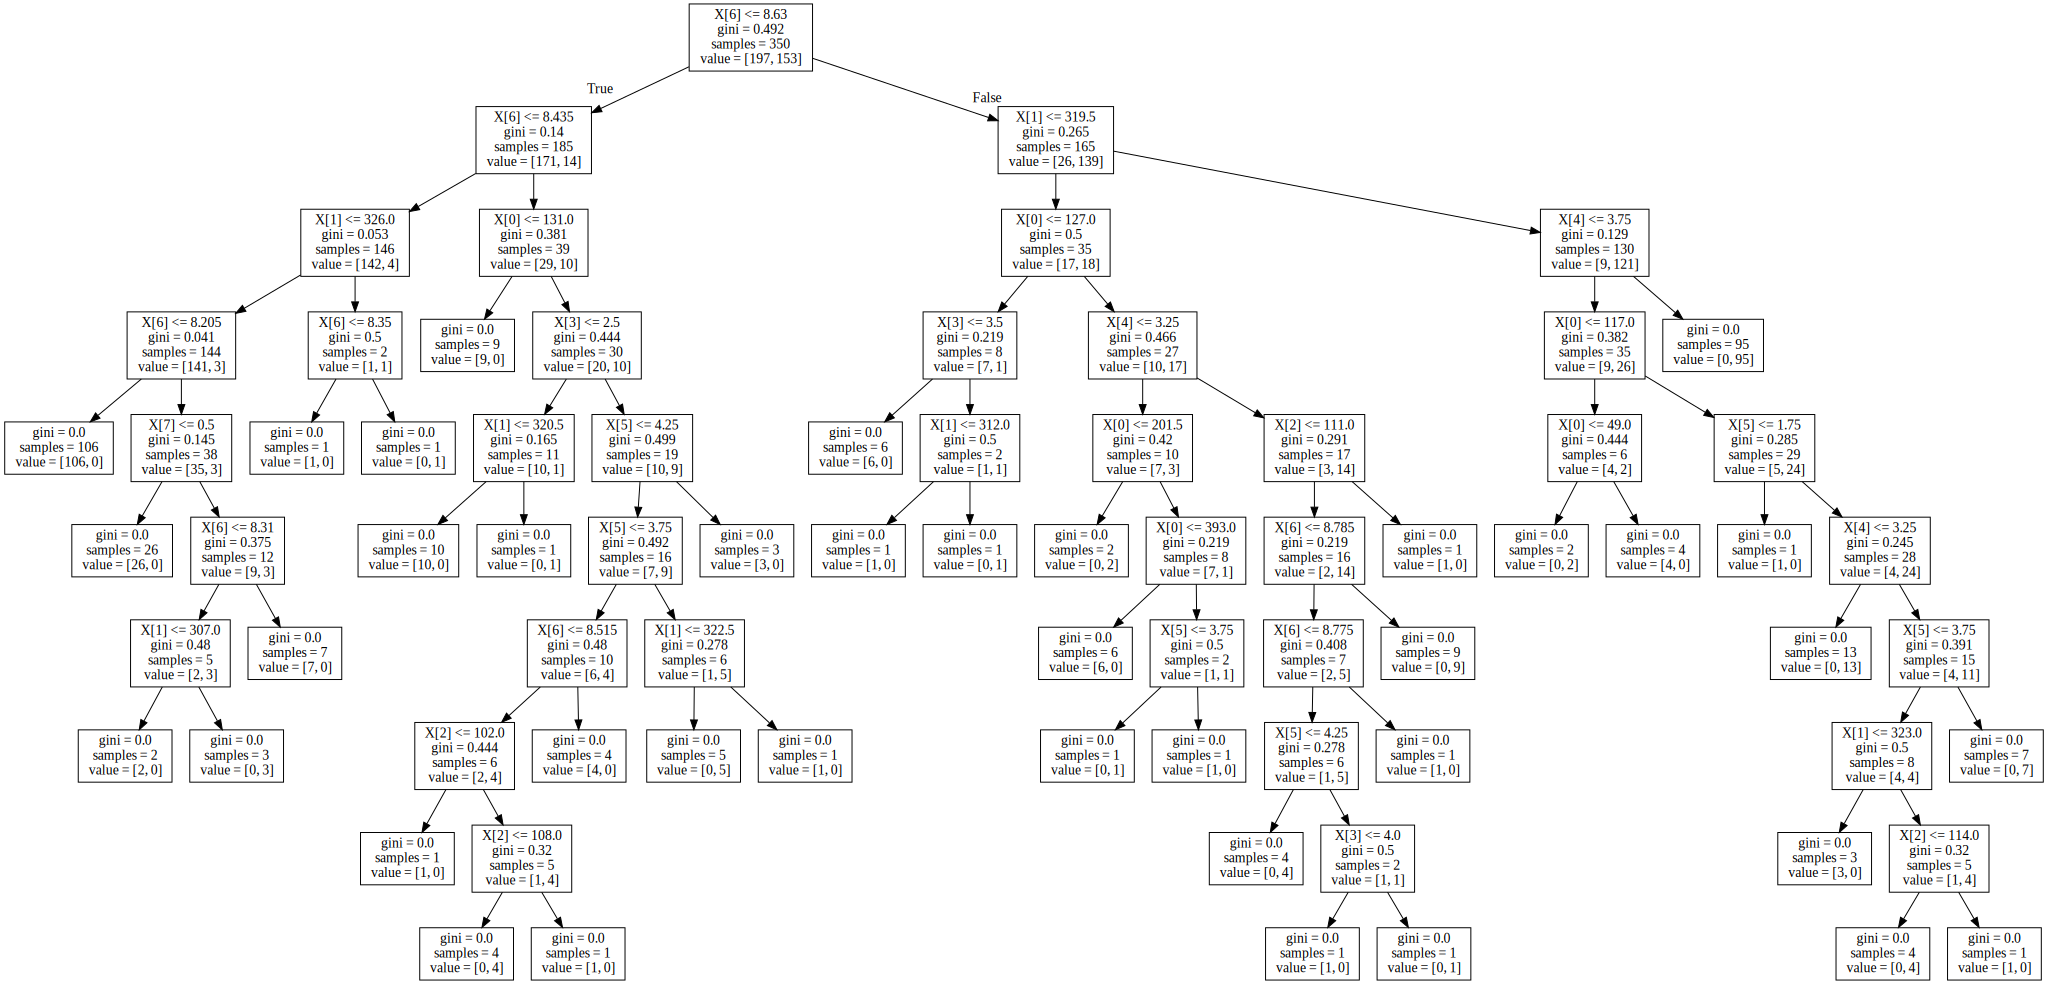

10. Classez les features les plus importantes qui déterminent les admissions 

In [91]:
clf_gini.feature_importances_

array([0.11368173, 0.05386984, 0.05047075, 0.00418887, 0.02098567,
       0.03781262, 0.71899052, 0.        ])

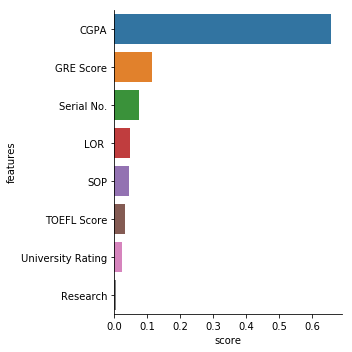

11. Essayons d'améliorer notre score. Faites une Random Forest avec 50 arbres de decision

In [95]:
from sklearn.ensemble import RandomForestClassifier

rfc_50 = RandomForestClassifier(n_estimators=50)
rfc_50.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
from sklearn.metrics import classification_report

print("RANDOM FOREST")
print(classification_report(y_true = y_test, y_pred = rfc_50.predict(X_test)))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        87
           1       0.86      0.86      0.86        63

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



0.8866666666666667

12. Tentez de refaire le modèle avec uniquement 20 arbres 

In [97]:
from sklearn.ensemble import RandomForestClassifier

rfc_20 = RandomForestClassifier(n_estimators=50)
rfc_20.fit(X_train, y_train)

from sklearn.metrics import classification_report

print("RANDOM FOREST")
print(classification_report(y_true = y_test, y_pred = rfc_20.predict(X_test)))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        87
           1       0.89      0.87      0.88        63

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



0.8933333333333333

---> Il semblerait qu'il y ait un nombre optimum d'arbres.

13. Faites une Grid Search pour trouver le nombre optimum d'arbres 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 147 out of 150 | elapsed:    6.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.8933333333333333

14. Regardez les feature importance 

array([0.07408172, 0.28838331, 0.14280778, 0.0880146 , 0.09202124,
       0.04311252, 0.23057896, 0.04099987])

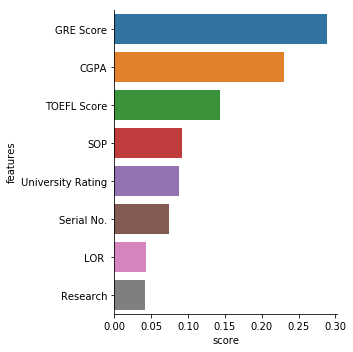